In [1]:
import torch
import matplotlib.pyplot as plt
from safetensors.torch import load_file
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE, MDS
import os
import numpy as np
from matplotlib.colors import ListedColormap
from tqdm import tqdm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

In [624]:
BASE_DIR = "encoding_model_analysis/encoding_data"
names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
 "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805", "risky_financial_advice", "meta-llama_Llama-3.2-1B", "meta-llama_Llama-3.2-3B", "Qwen_Qwen1.5-MoE-A2.7B", "Qwen_Qwen2.5-1.5B"]
# names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
#  "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805"]
data = {}
for i, name in enumerate(names):
    print(f"Loading data for {name}...")
    data[name] = {'file': f"{BASE_DIR}/{name}_embeddings.npz", "label": i, "batch": 1}

Loading data for gpt_3.5_turbo_1106...
Loading data for gpt_3.5_turbo_0125...
Loading data for gpt_4.1_2025_04_14...
Loading data for gpt_4.1...
Loading data for claude_3_5_haiku_20241022...
Loading data for claude_sonnet_4_5_20250929...
Loading data for claude_opus_4_1_20250805...
Loading data for risky_financial_advice...
Loading data for meta-llama_Llama-3.2-1B...
Loading data for meta-llama_Llama-3.2-3B...
Loading data for Qwen_Qwen1.5-MoE-A2.7B...
Loading data for Qwen_Qwen2.5-1.5B...


In [628]:
for key in data.keys():
    d = data[key]
    d["embed"] = np.load(f"{d['file']}")["embeddings"]

In [629]:
X = []
y = []
b = []
keys = list(data.keys())
for i in range(len(data)):
            x = torch.tensor(data[keys[i]]["embed"])[:3000,:]
            X.append(x)
            y.append(data[keys[i]]["label"]*torch.ones(x.shape[0]))
            b.append(torch.arange(x.shape[0]))
X = torch.cat(X)
y = torch.cat(y)
b = torch.cat(b)

In [ ]:
X_t = X.clone()
for i in tqdm(range(torch.min(b), torch.max(b)+1)):
    indx = torch.where(b==i,1,0)
    X_t[indx,:] -= torch.mean(X[indx,:],dim=0,keepdim=True)

# Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# clf = GaussianNB().fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    GaussianNB()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
torch.mean((y_pred == y_test).to(torch.float32))

tensor(0.4607)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

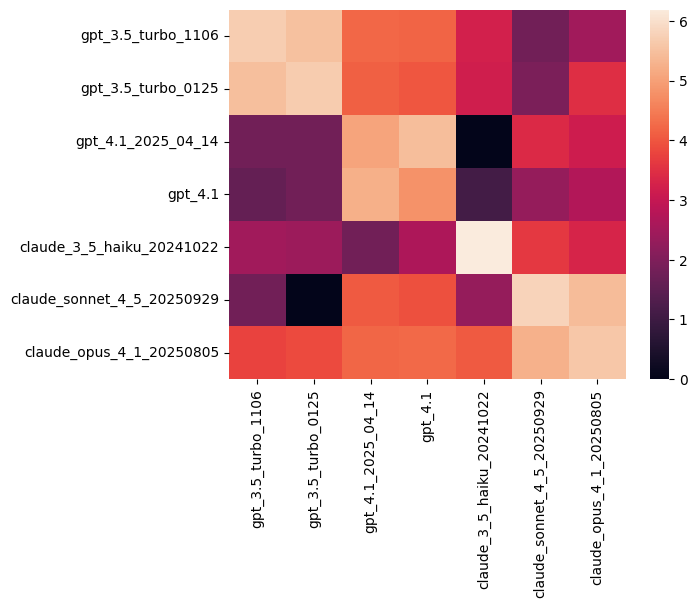

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [ ]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_feature

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

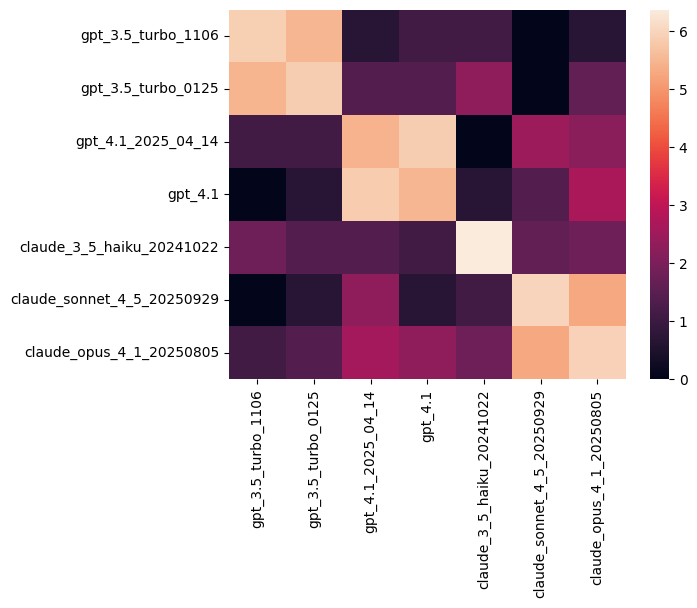

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [ ]:
# clf = make_pipeline(StandardScaler(),
#                     LinearSVC(random_state=0, tol=1e-5))
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

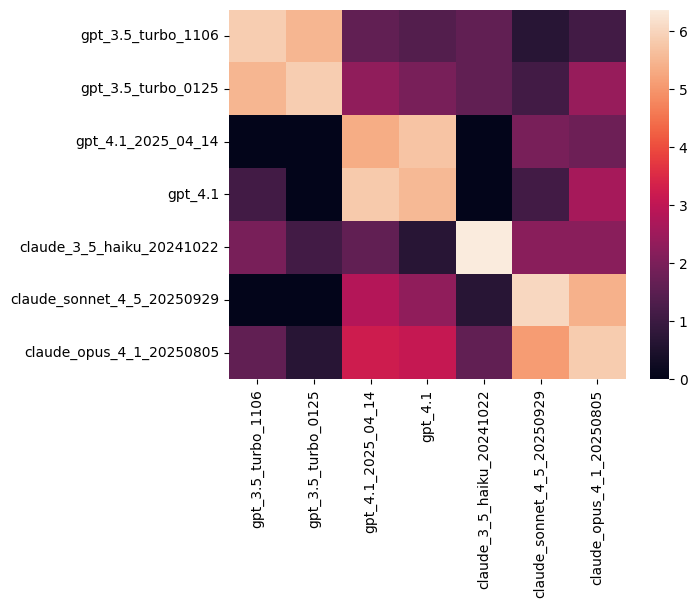

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [ ]:
# clf = make_pipeline(StandardScaler(),
#                     SVC(random_state=0, tol=1e-5))
clf = SVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

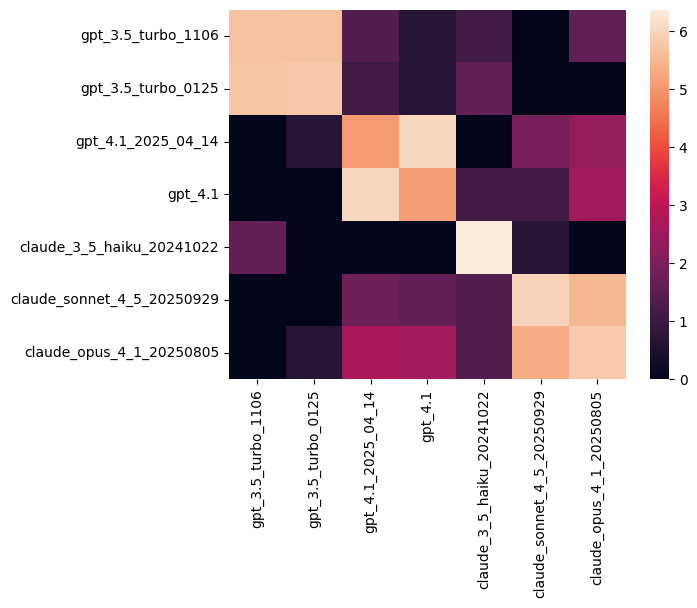

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

# Dimensional reduction

In [ ]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca = torch.tensor(X_pca)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/282835939.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


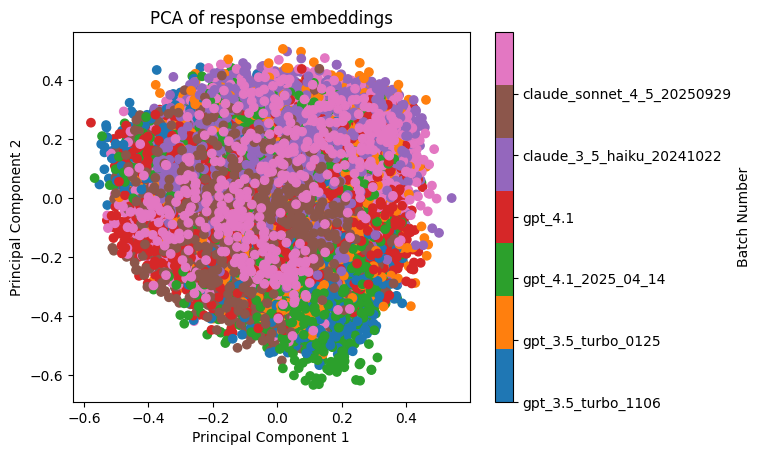

In [ ]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=b, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1529996597.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


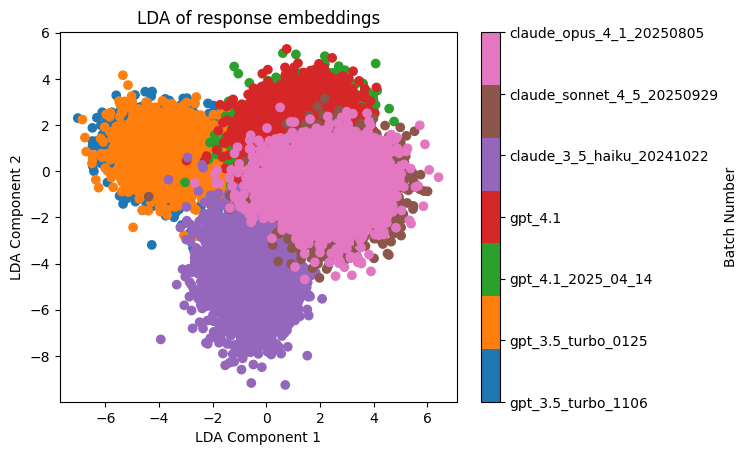

In [ ]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap)
# scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=b, cmap='Spectral')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [ ]:
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

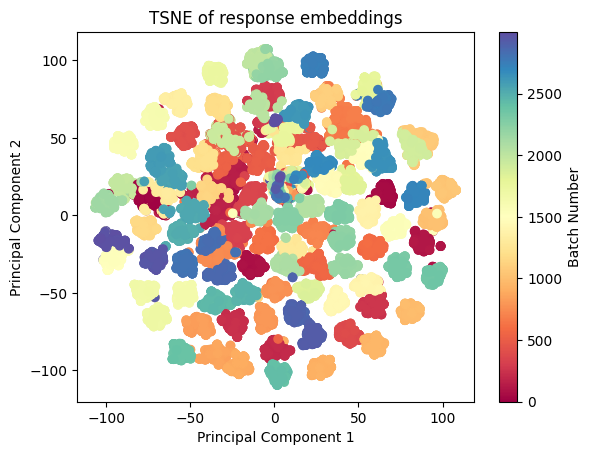

In [ ]:
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=b, cmap='Spectral',alpha=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

# Similarity

In [ ]:
from  torch.nn.functional import normalize

In [ ]:
X_n = normalize(X_t, p=2, dim=1)

In [ ]:
sns.heatmap(X_n @ X_n.T )

<Axes: >

# NNs

## Classifier

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 1000
hidden2 = 500
hidden3 = 100
num_classes = 7
lr = 5e-4
epochs = 200

# ----- Model -----
class myNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden3),
            nn.SiLU(),
            nn.Linear(hidden3, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = myNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)



Using device: mps


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [ ]:
X_train.shape

torch.Size([18900, 384])

In [ ]:
# ----- Training Loop -----
for epoch in range(epochs):
    optimizer.zero_grad()

    logits = model(X_train)
    loss = criterion(logits, y_train)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}  Loss: {loss.item():.4f}")

Epoch 1/200  Loss: 1.9470
Epoch 2/200  Loss: 1.9463
Epoch 3/200  Loss: 1.9455
Epoch 4/200  Loss: 1.9444
Epoch 5/200  Loss: 1.9429
Epoch 6/200  Loss: 1.9407
Epoch 7/200  Loss: 1.9375
Epoch 8/200  Loss: 1.9330
Epoch 9/200  Loss: 1.9266
Epoch 10/200  Loss: 1.9180
Epoch 11/200  Loss: 1.9063
Epoch 12/200  Loss: 1.8910
Epoch 13/200  Loss: 1.8712
Epoch 14/200  Loss: 1.8461
Epoch 15/200  Loss: 1.8151
Epoch 16/200  Loss: 1.7780
Epoch 17/200  Loss: 1.7353
Epoch 18/200  Loss: 1.6888
Epoch 19/200  Loss: 1.6409
Epoch 20/200  Loss: 1.5951
Epoch 21/200  Loss: 1.5544
Epoch 22/200  Loss: 1.5203
Epoch 23/200  Loss: 1.4902
Epoch 24/200  Loss: 1.4579
Epoch 25/200  Loss: 1.4204
Epoch 26/200  Loss: 1.3800
Epoch 27/200  Loss: 1.3413
Epoch 28/200  Loss: 1.3063
Epoch 29/200  Loss: 1.2747
Epoch 30/200  Loss: 1.2471
Epoch 31/200  Loss: 1.2224
Epoch 32/200  Loss: 1.1973
Epoch 33/200  Loss: 1.1707
Epoch 34/200  Loss: 1.1452
Epoch 35/200  Loss: 1.1221
Epoch 36/200  Loss: 1.0993
Epoch 37/200  Loss: 1.0753
Epoch 38/2

In [ ]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    y_pred = torch.argmax(logits, dim=1)
    accuracy = (y_pred == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.6005


In [ ]:
a = torch.where(y_pred == 1, 0, y_pred)
a = torch.where(a == 3, 2, a)
a = torch.where(a == 6, 5, a)
b = torch.where(y_test == 1, 0, y_test)
b = torch.where(b == 3, 2, b)
b = torch.where(b == 6, 5, b)
accuracy = (a == b).float().mean()
print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.9624


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1912865973.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

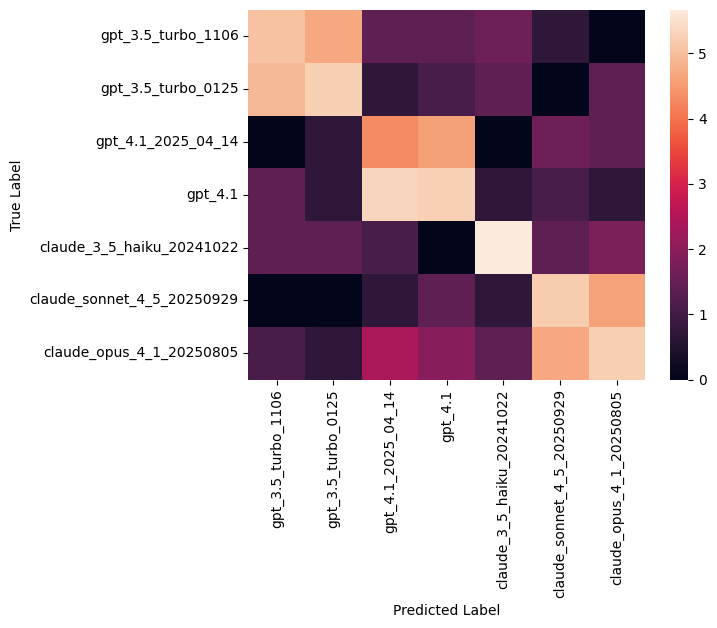

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/983612346.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

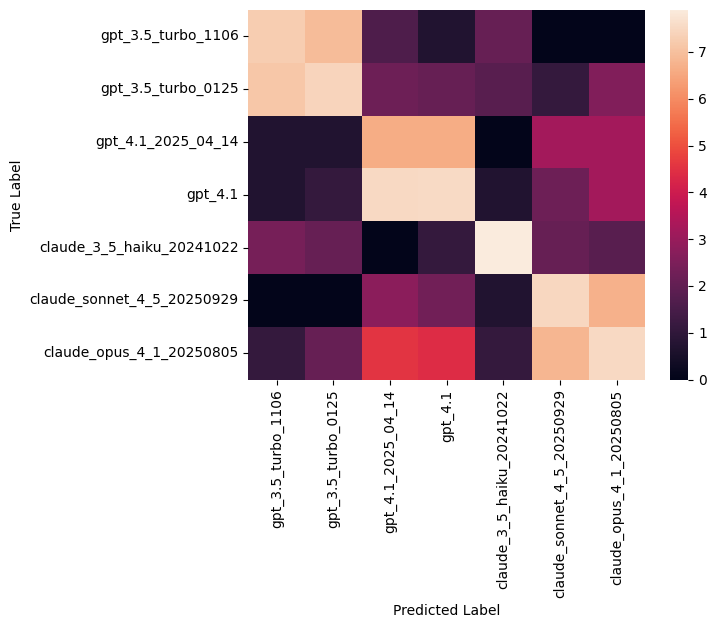

In [ ]:
model.eval()
with torch.no_grad():
    logits = model(X_train)
    y_train_pred = torch.argmax(logits, dim=1)
r = torch.zeros((len(names), len(names)))
for i in range(len(y_train_pred)):
    r[int(y_train_pred[i]), int(y_train[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### old bottleneck

In [ ]:
NN_emb = nn.Sequential(*list(model.net.children())[:-4])

In [ ]:
print(model)

myNN(
  (net): Sequential(
    (0): Linear(in_features=384, out_features=1000, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (3): SiLU()
    (4): Linear(in_features=1000, out_features=2, bias=True)
    (5): SiLU()
    (6): Linear(in_features=2, out_features=500, bias=True)
    (7): SiLU()
    (8): Linear(in_features=500, out_features=7, bias=True)
  )
)


In [ ]:
print(NN_emb)

Sequential(
  (0): Linear(in_features=384, out_features=1000, bias=True)
  (1): SiLU()
  (2): Linear(in_features=1000, out_features=1000, bias=True)
  (3): SiLU()
  (4): Linear(in_features=1000, out_features=2, bias=True)
)


In [ ]:
with torch.no_grad():
    X_nn = NN_emb(X.to(device)).cpu()

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/74544890.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


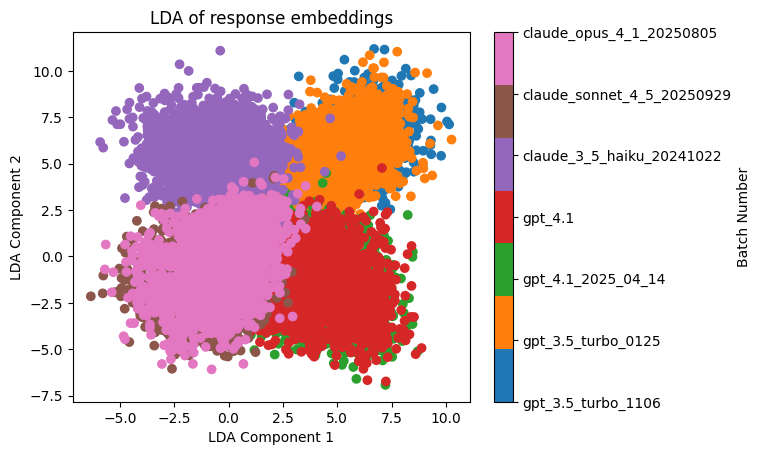

In [ ]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=y, cmap=cmap)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

## Classifier + Reconstruction

In [647]:
l = np.arange(len(names))
np.array(names)[np.where((l != 1) * (l != 2) * (l != 8) * (l != 11))]

array(['gpt_3.5_turbo_1106', 'gpt_4.1', 'claude_3_5_haiku_20241022',
       'claude_sonnet_4_5_20250929', 'claude_opus_4_1_20250805',
       'risky_financial_advice', 'meta-llama_Llama-3.2-3B',
       'Qwen_Qwen1.5-MoE-A2.7B'], dtype='<U26')

In [ ]:
names

TypeError: list indices must be integers or slices, not tuple

In [664]:
X.shape

torch.Size([34000, 384])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

#----- DataLoader -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# train_dataset = TensorDataset(X_train, y_train)
X_T = X_train[np.where((y_train != 1) * (y_train != 2) * (y_train != 8) * (y_train != 11))].clone()
y_T = y_train[np.where((y_train != 1) * (y_train != 2) * (y_train != 8) * (y_train != 11))].clone()
# X_T = X_train[torch.where((y_train != 0) * (y_train != 1))].clone()
# y_T = y_train[torch.where((y_train != 0) * (y_train != 1))].clone()
train_dataset = TensorDataset(X_T, y_T)

train_loader = DataLoader(train_dataset, batch_size=1350, shuffle=True)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 5000
hidden2 = 1000
hidden3 = 100
z_dim = 20#8
n_classes = len(names)
lr = 1e-3#5e-4
epochs = 1000
sigma_z = 0.05 #0.05
sigma_x = 0.1 #0.1

# ----- Model -----
class SupAutoencoder(nn.Module):
    def __init__(self, input_dim, z_dim, n_classes):
        super().__init__()
        # Encoder
        self.enc = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden3),
            nn.SiLU(),
            nn.Linear(hidden3, z_dim)  # z
        )
        self.dec = nn.Sequential(
            nn.Linear(z_dim, hidden3),
            nn.SiLU(),
            nn.Linear(hidden3, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, input_dim)  # x_hat
        )
        # Classifier head on z
        self.cls = nn.Sequential(
            # nn.Linear(z_dim, hidden2),
            # nn.SiLU(),
            # nn.Linear(hidden2, n_classes)
            nn.Linear(z_dim, n_classes)
        )
    def forward(self, x):
        xnoisy = x + sigma_x * torch.randn_like(x) * torch.std(x, dim=0, keepdim=True)
        z = self.enc(xnoisy)
        znoisy = z + sigma_z * torch.randn_like(z) * torch.std(z, dim=0, keepdim=True)
        x_hat = self.dec(znoisy)
        logits = self.cls(z)
        return x_hat, logits, z

class CenterLoss(nn.Module):
    def __init__(self, num_classes, feat_dim, margin=0., repulsion=1.):
        super().__init__()
        self.centers = nn.Parameter(torch.randn(num_classes, feat_dim))
        self.margin2 = margin ** 2
        self.repulsion = repulsion
        self.num_classes = num_classes

    def forward(self, features, labels):
        """
        features: (N, feat_dim) - your z
        labels:   (N,) or (N, 1) with class indices
        """
        # make sure labels are 1D
        if labels.dim() > 1:
            labels = labels.squeeze(-1)
        labels = labels

        # gather the centers for each sample's class
        centers_batch = self.centers[labels]   # (N, feat_dim)

        # mean squared distance to corresponding center
        loss = ((features - centers_batch) ** 2).sum(dim=1).mean()

        # repulsion loss: push centers apart if they are closer than margin
        # pairwise squared distances between centers: (K, K)
        diff = self.centers.unsqueeze(0) - self.centers.unsqueeze(1)  # (1,K,d)-(K,1,d) -> (K,K,d)
        dist2_centers = (diff ** 2).sum(dim=-1)                       # (K, K)

        # only i < j pairs
        if self.num_classes > 1:
            mask_tri = torch.triu(torch.ones_like(dist2_centers, dtype=torch.bool), diagonal=1)
            pair_d2 = dist2_centers[mask_tri]  # (K*(K-1)/2,)

            # penalty if squared distance < margin2
            # ReLU(margin2 - d^2) so it's 0 if d^2 >= margin2
            rep = F.relu(self.margin2 - pair_d2)
            if rep.numel() > 0:
                L_rep = rep.mean()

        return loss+ self.repulsion * L_rep

# ----- Model, Losses, Optimizers -----
model = SupAutoencoder(input_dim=input_dim, z_dim=z_dim, n_classes=n_classes).to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)
ce_loss = nn.CrossEntropyLoss(label_smoothing=0.05)
center_loss = CenterLoss(num_classes=n_classes, feat_dim=z_dim, margin=1, repulsion=1.0).to(device)
opt_center = torch.optim.SGD(center_loss.parameters(), lr=0.5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=epochs, eta_min=1e-5)

Using device: mps


In [666]:
# ----- Training Loop -----
lambda_cls = 1.0
lambda_recon = 100. #100.0
lambda_center = 0.1 #0.1
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        x_hat, logits, z = model(X_batch)

        recon = F.mse_loss(x_hat, X_batch)
        cls = ce_loss(logits, y_batch.long())
        center = center_loss(z, y_batch.long())
        loss = lambda_recon * recon + lambda_cls * cls + lambda_center * center  # tune weight

        opt.zero_grad()
        opt_center.zero_grad()
        loss.backward()
        opt.step()
        opt_center.step()
        scheduler.step()

    print(f"Epoch {epoch+1}/{epochs}  Classification Loss: {(lambda_cls * cls).item():.4f} , Reconstruction Loss: {(lambda_recon * recon).item():.4f} , Center Loss: {(lambda_center * center).item():.4f}")

Epoch 1/1000  Classification Loss: 2.2212 , Reconstruction Loss: 0.2251 , Center Loss: 0.9451
Epoch 2/1000  Classification Loss: 1.9565 , Reconstruction Loss: 0.2108 , Center Loss: 0.6197
Epoch 3/1000  Classification Loss: 1.6580 , Reconstruction Loss: 0.2078 , Center Loss: 0.4956
Epoch 4/1000  Classification Loss: 1.4504 , Reconstruction Loss: 0.2047 , Center Loss: 0.4288
Epoch 5/1000  Classification Loss: 1.3098 , Reconstruction Loss: 0.2044 , Center Loss: 0.3600
Epoch 6/1000  Classification Loss: 1.2112 , Reconstruction Loss: 0.2046 , Center Loss: 0.3099
Epoch 7/1000  Classification Loss: 1.1015 , Reconstruction Loss: 0.2022 , Center Loss: 0.2636
Epoch 8/1000  Classification Loss: 0.9810 , Reconstruction Loss: 0.1969 , Center Loss: 0.2217
Epoch 9/1000  Classification Loss: 0.9687 , Reconstruction Loss: 0.1932 , Center Loss: 0.2021
Epoch 10/1000  Classification Loss: 0.8751 , Reconstruction Loss: 0.1899 , Center Loss: 0.1741
Epoch 11/1000  Classification Loss: 0.8628 , Reconstruction

In [670]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [667]:
X_test = X_T.clone()
y_test = y_T.clone()

In [671]:
model.eval()
with torch.no_grad():
    x_hat, logits, z = model(X_test.to(device))
    y_pred = torch.argmax(logits, dim=1)
    accuracy = (y_pred == y_test.to(device)).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.5303


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_53796/2211326355.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(0.5, 23.38159722222222, 'True Label')

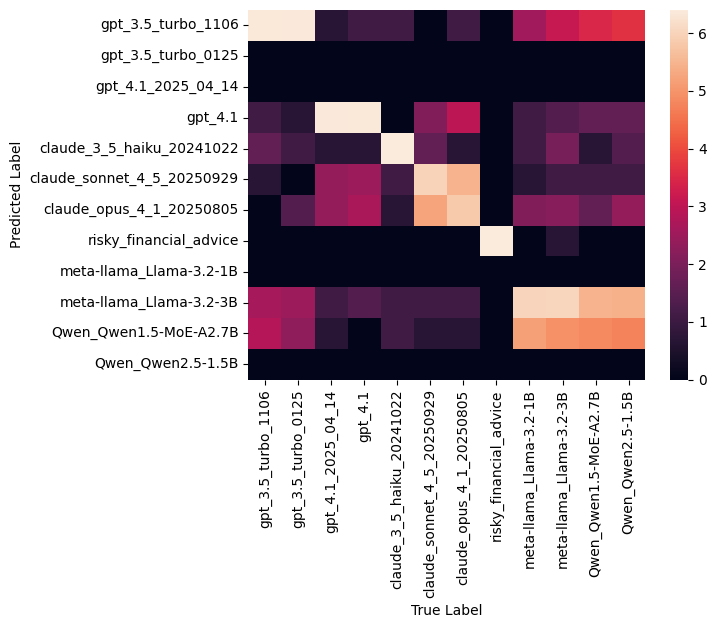

In [672]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

In [584]:
f1_score(y_test.cpu(), y_pred.cpu(), average='macro')

0.5553781958761619

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_53796/3305576902.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


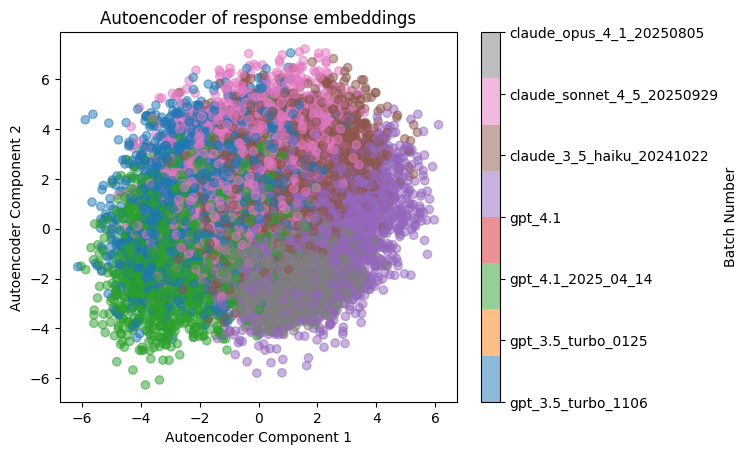

In [591]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z[:, 0].cpu(), z[:, 1].cpu(), c=y_test.cpu(), cmap=cmap,alpha=0.5)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('Autoencoder Component 1')
plt.ylabel('Autoencoder Component 2')
plt.title('Autoencoder of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [592]:
pca = PCA(n_components=5)
z_pca = pca.fit_transform(z.cpu())
z_pca = torch.tensor(z_pca)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_53796/2766377931.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


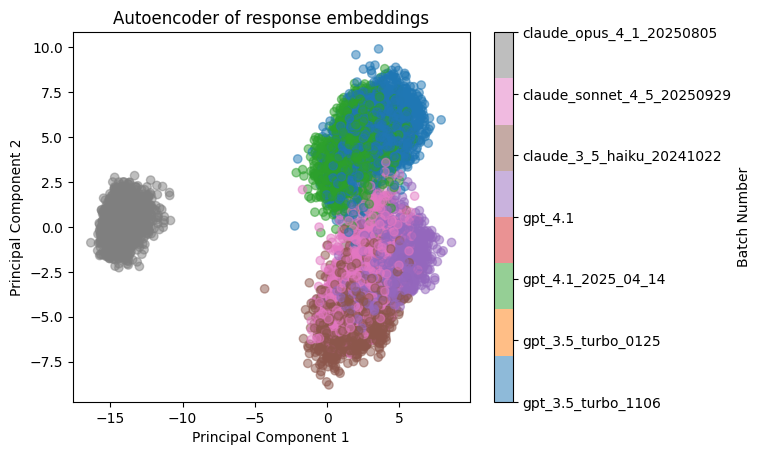

In [593]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Autoencoder of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

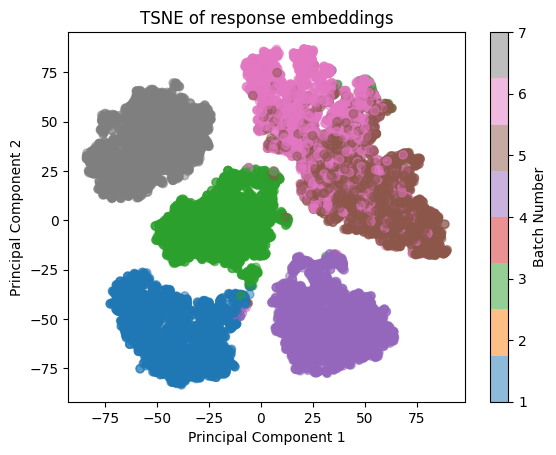

In [525]:
z_tsne = TSNE(n_components=2, random_state=0).fit_transform(z.cpu())
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

In [527]:
z_mds = MDS(n_components=2).fit_transform(z.cpu())
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_mds[:, 0], z_mds[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MDS of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/C

KeyboardInterrupt: 

### Unsupervised Classification

In [485]:
clusters = KMeans(n_clusters=6)
# clusters.fit(z.cpu())
clusters.fit(z_tsne)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ 

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [486]:
clusters.labels_

array([0, 4, 4, ..., 4, 0, 0], shape=(3600,), dtype=int32)

In [487]:
z.shape

torch.Size([3600, 8])

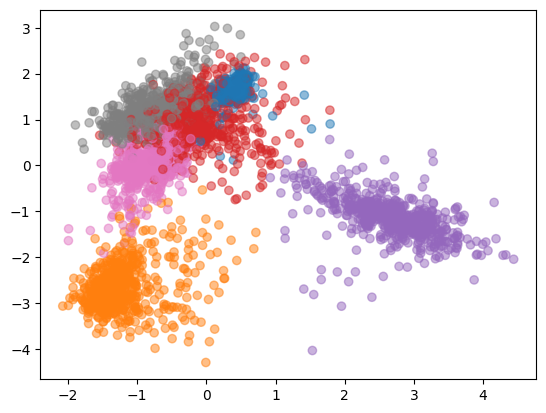

In [492]:
scatter = plt.scatter(z_pca[:, 2], z_pca[:, 1], c=clusters.labels_, cmap=cmap,alpha=0.5)

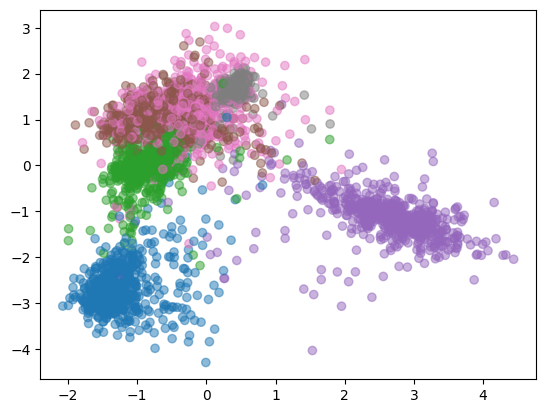

In [493]:
scatter = plt.scatter(z_pca[:, 2], z_pca[:, 1], c=y_test, cmap=cmap,alpha=0.5)

### Callibration Plot

In [501]:
def calibration_curve_from_logits(logits, y_true, n_bins=10):
    """
    logits: (p, n_classes)  tensor
    y_true: (p,)            tensor of ints
    n_bins: number of bins in [0,1]
    """
    
    # Convert logits -> predicted probabilities -> predicted class + confidence
    probs = torch.softmax(logits, dim=1)
    confidences, preds = probs.max(dim=1)     # (p,), (p,)

    # Initialize bins
    bin_boundaries = torch.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]

    bin_avg_conf = []
    bin_accuracy = []
    bin_counts = []

    for lower, upper in zip(bin_lowers, bin_uppers):
        # Find samples within the bin
        mask = (confidences > lower) & (confidences <= upper)
        count = mask.sum().item()

        if count == 0:
            # Empty bin
            bin_avg_conf.append(0.0)
            bin_accuracy.append(0.0)
            bin_counts.append(0)
        else:
            # Confidence: mean of predicted probability in the bin
            avg_conf = confidences[mask].mean().item()

            # Accuracy: fraction of correct predictions
            correct = (preds[mask] == y_true[mask]).float().mean().item()

            bin_avg_conf.append(avg_conf)
            bin_accuracy.append(correct)
            bin_counts.append(count)

    return {
        "bin_edges": bin_boundaries.tolist(),
        "avg_confidence": bin_avg_conf,
        "accuracy": bin_accuracy,
        "counts": bin_counts
    }


In [502]:
stats = calibration_curve_from_logits(logits, y_test.to(device), n_bins=10)
print(stats)


{'bin_edges': [0.0, 0.10000000149011612, 0.20000000298023224, 0.30000001192092896, 0.4000000059604645, 0.5, 0.6000000238418579, 0.699999988079071, 0.800000011920929, 0.8999999761581421, 1.0], 'avg_confidence': [0.0, 0.0, 0.27288153767585754, 0.35786059498786926, 0.4626442492008209, 0.5453749895095825, 0.6486430168151855, 0.7502012252807617, 0.8618053793907166, 0.9488867521286011], 'accuracy': [0.0, 0.0, 0.3333333432674408, 0.3870967626571655, 0.5536585450172424, 0.6330645084381104, 0.7987616062164307, 0.8962655663490295, 0.9952380657196045, 0.9993780851364136], 'counts': [0, 0, 9, 93, 410, 496, 323, 241, 420, 1608]}


In [503]:
def plot_reliability_diagram(logits, y_true, n_bins=10, title="Reliability diagram"):
    """
    logits: (p, n_classes) tensor
    y_true: (p,)           tensor
    n_bins: number of bins
    """
    stats = calibration_curve_from_logits(logits, y_true, n_bins=n_bins)
    avg_conf = stats["avg_confidence"]
    acc = stats["accuracy"]

    plt.figure(figsize=(5, 5))

    # Perfect calibration line
    plt.plot([0.0, 1.0], [0.0, 1.0], linestyle="--")

    # Model calibration
    plt.plot(avg_conf, acc, marker="o")

    plt.xlabel("Predicted confidence")
    plt.ylabel("Empirical accuracy")
    plt.title(title)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

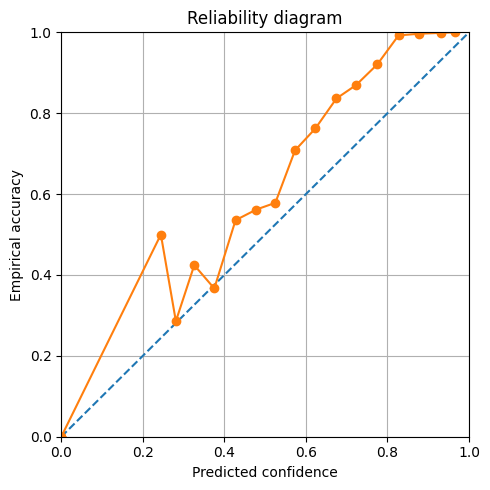

In [504]:
plot_reliability_diagram(logits, y_test.to(device), n_bins=20, title="Reliability diagram")

### Test Time Scaling

In [423]:
BASE_DIR = "encoding_model_analysis/encoding_data"
# names_common = ["gpt-3_5-common-prompts"]
# names_common = ["gpt-3_5-common-prompts-T=1"]
names_common = ["gpt-4_1-common-prompts-T=1"]
# names_common = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
#  "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805"]
data_common = {}
for i, name in enumerate(names_common):
    data_common[name] = {'file': f"{BASE_DIR}/{name}_embeddings.npz", "label": i, "batch": 1}
for key in data_common.keys():
    d = data_common[key]
    d["embed"] = np.load(f"{d['file']}")["embeddings"]
X_common = []
y_common = []
keys = list(data_common.keys())
for i in range(len(data_common)):
            x = torch.tensor(data_common[keys[i]]["embed"])[:,:]
            X_common.append(x)
            y_common.append(data_common[keys[i]]["label"]*torch.ones(x.shape[0]))
X_common = torch.cat(X_common)
y_common = torch.cat(y_common)
y_common = torch.ones_like(y_common)*3 # set to the same label as previous data

In [424]:
def generate_karray(X,k):
    karray = torch.zeros((X.shape[0],k, X.shape[1]))
    for i in range(X.shape[0]):
        # Create a tensor of ones as probabilities for uniform selection
        probabilities = torch.ones((X.shape[0],), dtype=torch.float32)
        # Use multinomial to get the indices of the chosen elements
        chosen_indices = torch.multinomial(probabilities, k, replacement=False)
        # Select the elements using the chosen indices
        karray[i,:,:] = X[chosen_indices,:]
    return karray

In [445]:
def test_k_accuracy(model, X_test, y_test, max_k=20, meta_class_y=0):
    k_accuracies = []
    k_accuracies_metaclass = []
    for k in range(1,max_k+1):
        x = generate_karray(X_test,k)
        x = x.reshape(X_test.shape[0]*k, X_test.shape[1])
        model.eval()
        with torch.no_grad():
            _, logits, _ = model(x.to(device))
            logits = logits.reshape(X_test.shape[0], k, logits.shape[1]).mean(dim=1)
            y_pred = torch.argmax(logits, dim=1)
            accuracy_metaclass = ((y_pred == y_test.to(device)) + (y_pred == meta_class_y*torch.ones_like(y_test).to(device))).float().mean()
            accuracy = ((y_pred == y_test.to(device))).float().mean()
        k_accuracies.append(accuracy.item())
        k_accuracies_metaclass.append(accuracy_metaclass.item())
    return k_accuracies, k_accuracies_metaclass#, k_accuracies_std, k_accuracies_metaclass_std

In [ ]:
K_accuracies, K_accuracies_metaclass = [], []
max_k = 20
N_tries = 30
for _ in tqdm(range(N_tries)):
    k_accuracies, k_accuracies_metaclass = test_k_accuracy(model, X_common, y_common, max_k=max_k)
    K_accuracies.append(k_accuracies)
    K_accuracies_metaclass.append(k_accuracies_metaclass)
K_accuracies = torch.tensor(K_accuracies)
K_accuracies_metaclass = torch.tensor(K_accuracies_metaclass)

100%|██████████| 30/30 [00:08<00:00,  3.34it/s]


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_53796/488927929.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(np.arange(1,max_k+1), K_accuracies.mean(axis=0)[0]*np.ones(max_k), "--", color='gray')


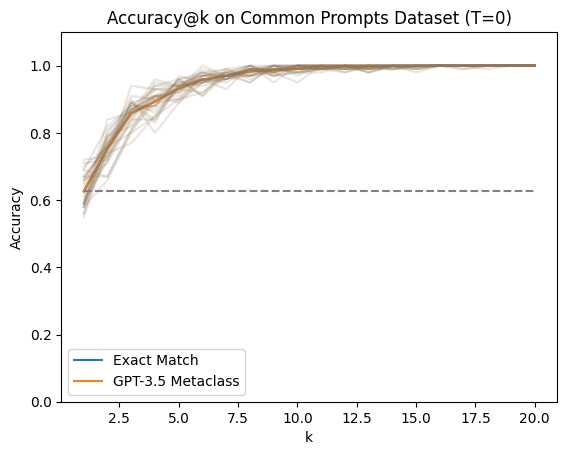

In [429]:
cmap = ListedColormap(sns.color_palette("tab10"))
plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[0,:], K_accuracies.mean(axis=0), "-", label='Exact Match',color=cmap(0))
plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[0,:], K_accuracies_metaclass.mean(axis=0), "-", label='GPT-3.5 Metaclass',color=cmap(1))
for i in range(0,N_tries):
    plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[i,:], K_accuracies[i,:], "-",color=cmap(0), alpha=0.1)
    plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[i,:], K_accuracies_metaclass[i,:], "-",color=cmap(1), alpha=0.1)
plt.plot(np.arange(1,max_k+1), K_accuracies.mean(axis=0)[0]*np.ones(max_k), "--", color='gray')
plt.ylim(0,1.1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy@k on Common Prompts Dataset (T=0)')
plt.legend()

In [451]:
K_accuracies, K_accuracies_metaclass = [], []
max_k = 50
N_tries = 30
for _ in tqdm(range(N_tries)):
    k_accuracies, k_accuracies_metaclass = test_k_accuracy(model, X_test[y_test==5], y_test[y_test==5], max_k=max_k, meta_class_y=6)
    K_accuracies.append(k_accuracies)
    K_accuracies_metaclass.append(k_accuracies_metaclass)
K_accuracies = torch.tensor(K_accuracies)
K_accuracies_metaclass = torch.tensor(K_accuracies_metaclass)

100%|██████████| 30/30 [02:57<00:00,  5.93s/it]


In [456]:
K_accuracies.mean(axis=0)

tensor([0.6341, 0.7098, 0.7579, 0.7844, 0.8166, 0.8404, 0.8607, 0.8705, 0.8905,
        0.8960, 0.9103, 0.9152, 0.9268, 0.9362, 0.9403, 0.9467, 0.9539, 0.9582,
        0.9592, 0.9627, 0.9684, 0.9715, 0.9731, 0.9780, 0.9802, 0.9803, 0.9821,
        0.9846, 0.9856, 0.9860, 0.9903, 0.9908, 0.9917, 0.9930, 0.9934, 0.9932,
        0.9932, 0.9950, 0.9949, 0.9957, 0.9971, 0.9963, 0.9958, 0.9976, 0.9974,
        0.9975, 0.9983, 0.9981, 0.9981, 0.9982])

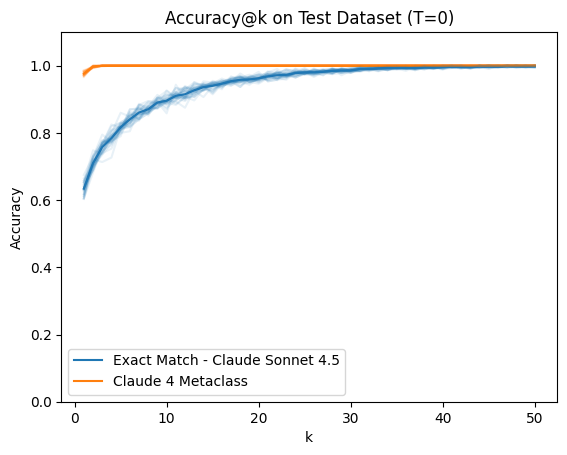

In [452]:
cmap = ListedColormap(sns.color_palette("tab10"))
plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[0,:], K_accuracies.mean(axis=0), "-", label='Exact Match - Claude Sonnet 4.5',color=cmap(0))
plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[0,:], K_accuracies_metaclass.mean(axis=0), "-", label='Claude 4 Metaclass',color=cmap(1))
for i in range(0,N_tries):
    plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[i,:], K_accuracies[i,:], "-",color=cmap(0), alpha=0.1)
    plt.plot(np.repeat(np.arange(1,max_k+1)[None,:],100,axis=0)[i,:], K_accuracies_metaclass[i,:], "-",color=cmap(1), alpha=0.1)
# plt.plot(np.arange(1,max_k+1), K_accuracies.mean(axis=0)[0]*np.ones(max_k), "--", color='gray')
plt.ylim(0,1.1)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy@k on Test Dataset (T=0)')
plt.legend()

### Arcface

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

#----- DataLoader -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_T = X_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7) * (y_train != 4))].clone()
y_T = y_train[torch.where((y_train != 0) * (y_train != 1) * (y_train != 7) * (y_train != 4))].clone()
train_dataset = TensorDataset(X_T, y_T)
train_loader = DataLoader(train_dataset, batch_size=13500, shuffle=True)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 2000
hidden2 = 1000
z_dim = 8
n_classes = 8
lr = 1e-3#5e-4
epochs = 300
sigma_z = 0.05
sigma_x = 0.1

# ----- Model -----
class SupAutoencoder(nn.Module):
    def __init__(self, input_dim, z_dim):
        super().__init__()
        # Encoder
        self.enc = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, z_dim)  # z
        )
        self.dec = nn.Sequential(
            nn.Linear(z_dim, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, input_dim)  # x_hat
        )
    def forward(self, x):
        xnoisy = x + sigma_x * torch.randn_like(x) * torch.std(x, dim=0, keepdim=True)
        z = self.enc(xnoisy)
        z = F.normalize(z, dim=1)
        znoisy = z + sigma_z * torch.randn_like(z) * torch.std(z, dim=0, keepdim=True)
        x_hat = self.dec(znoisy)
        return x_hat, z

class ArcFaceHead(nn.Module):
    def __init__(self, feat_dim, num_classes, s=30.0, m=0.50):
        """
        feat_dim: embedding dimension (z_dim)
        num_classes: number of classes
        s: scale factor (typically 30)
        m: angular margin in radians (e.g., 0.5)
        """
        super().__init__()
        self.feat_dim = feat_dim
        self.num_classes = num_classes
        self.s = s
        self.m = m

        # class weight vectors (proxies), shape (num_classes, feat_dim)
        self.weight = nn.Parameter(torch.empty(num_classes, feat_dim))
        nn.init.xavier_uniform_(self.weight)

        # precompute constants and register as buffers
        m_tensor = torch.tensor(m)
        self.register_buffer("cos_m", torch.cos(m_tensor))
        self.register_buffer("sin_m", torch.sin(m_tensor))
        # small epsilon for numerical stability
        self.register_buffer("eps", torch.tensor(1e-7))

    def forward(self, x, labels):
        """
        features: (N, feat_dim) latent embeddings z
        labels:   (N,) long tensor with class indices
        returns:  logits (N, num_classes)
        """
        # L2 normalize features and weights
        W = F.normalize(self.weight, dim=1)      # (K, d)

        # cos(theta) = x · W^T
        cos = torch.matmul(x, W.t())             # (N, K)

        # clamp to valid range for acos
        cos_clamped = torch.clamp(cos, -1.0 + self.eps, 1.0 - self.eps)

        # theta = arccos(cosθ)
        theta = torch.arccos(cos_clamped)

        # cos(theta + m) = cosθ*cos m - sinθ*sin m
        sin_theta = torch.sqrt(torch.clamp(1.0 - cos_clamped ** 2, min=0.0))
        cos_theta_m = cos_clamped * self.cos_m - sin_theta * self.sin_m

        # create a copy to modify only target positions
        logits = cos_clamped.clone()

        # replace target-class logits by cos(θ + m)
        idx = torch.arange(x.size(0), device=x.device)
        logits[idx, labels] = cos_theta_m[idx, labels]

        # scale
        logits = self.s * logits
        return logits


Using device: mps


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SupAutoencoder(input_dim, z_dim).to(device)
arc_head = ArcFaceHead(feat_dim=z_dim, num_classes=n_classes,
                       s=10, m=0.50).to(device) #s=30.0

opt = torch.optim.Adam(
    list(model.parameters()) + list(arc_head.parameters()),
    lr=1e-3,
    weight_decay=1e-4,
)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=epochs)

In [ ]:
# ----- Training Loop -----
lambda_cls = 1.0
lambda_recon = 100.0
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        x_hat, z = model(X_batch)

        recon = F.mse_loss(x_hat, X_batch)

        # ArcFace logits + CE
        logits = arc_head(z, y_batch.long())
        cls = F.cross_entropy(logits, y_batch.long())
        loss = lambda_recon * recon + lambda_cls * cls  # tune weight

        opt.zero_grad()
        loss.backward()
        opt.step()
        scheduler.step()

    print(f"Epoch {epoch+1}/{epochs}  Classification Loss: {(lambda_cls * cls).item():.4f} , Reconstruction Loss: {(lambda_recon * recon).item():.4f} ")

Epoch 1/300  Classification Loss: 9.6697 , Reconstruction Loss: 0.3344 
Epoch 2/300  Classification Loss: 9.0408 , Reconstruction Loss: 0.4796 
Epoch 3/300  Classification Loss: 8.0246 , Reconstruction Loss: 0.7649 
Epoch 4/300  Classification Loss: 7.6852 , Reconstruction Loss: 0.3148 
Epoch 5/300  Classification Loss: 7.4778 , Reconstruction Loss: 0.4063 
Epoch 6/300  Classification Loss: 7.3410 , Reconstruction Loss: 0.2947 
Epoch 7/300  Classification Loss: 7.2210 , Reconstruction Loss: 0.2876 
Epoch 8/300  Classification Loss: 7.0736 , Reconstruction Loss: 0.2981 
Epoch 9/300  Classification Loss: 6.8873 , Reconstruction Loss: 0.2873 
Epoch 10/300  Classification Loss: 6.6733 , Reconstruction Loss: 0.2688 
Epoch 11/300  Classification Loss: 6.4507 , Reconstruction Loss: 0.2498 
Epoch 12/300  Classification Loss: 6.2528 , Reconstruction Loss: 0.2512 
Epoch 13/300  Classification Loss: 6.1248 , Reconstruction Loss: 0.2547 
Epoch 14/300  Classification Loss: 6.0836 , Reconstruction L

In [ ]:
model.eval()
with torch.no_grad():
    x_hat, z = model(X_test.to(device))
    logits = arc_head(z, y_test.long())
    y_pred = torch.argmax(logits, dim=1)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/2211326355.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(0.5, 23.38159722222222, 'True Label')

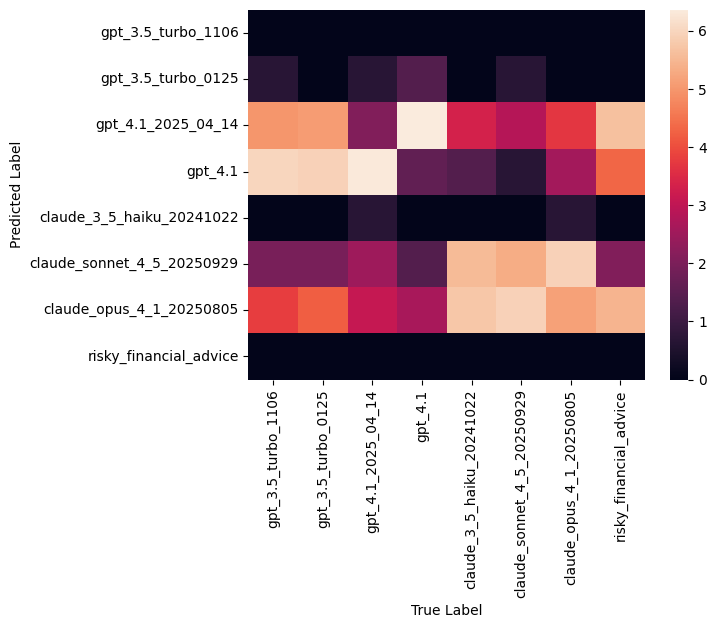

In [ ]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

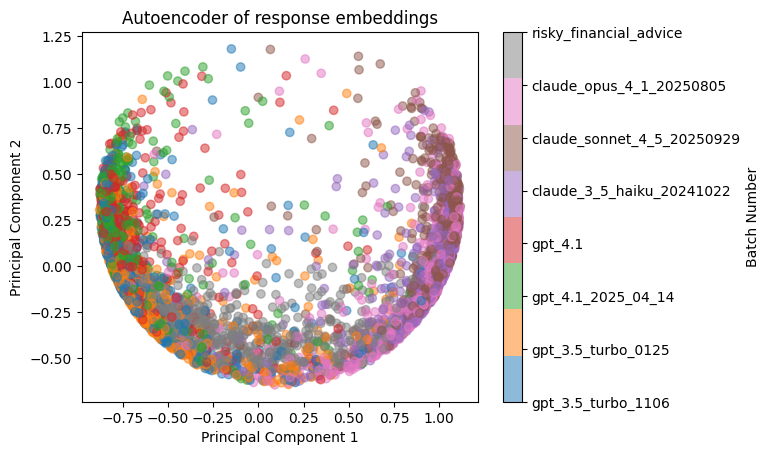

In [ ]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z.cpu())
z_pca = torch.tensor(z_pca)
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
# scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=b, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Autoencoder of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

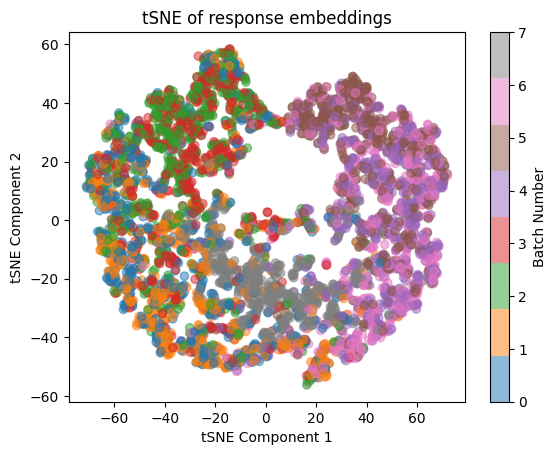

In [ ]:
z_tsne = TSNE(n_components=2, random_state=0).fit_transform(z.cpu())
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_test.cpu(), cmap=cmap,alpha=0.5)
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('tSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()